In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

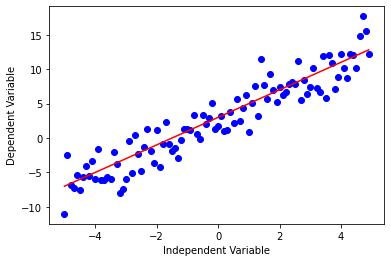

In [11]:
# Understanding of linear regression
x = np.arange(-5.0, 5.0, 0.1)
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata, 'bo')
plt.plot(x, y, '-r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

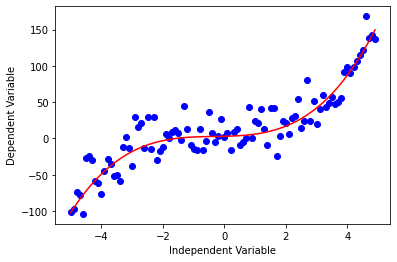

In [14]:
# Understanding non-linear regression using Cubic function
x = np.arange(-5.0, 5.0, 0.1)
y = 1*(x**3)+1*(x**2)+1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x,y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

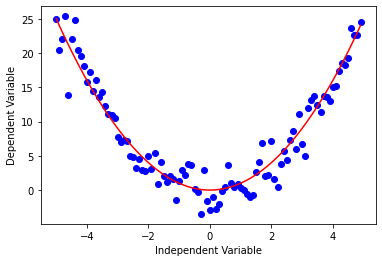

In [17]:
# Understanding non-linear regression using Quadratic function
x = np.arange(-5.0, 5.0, 0.1)
y = np.power(x, 2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

#### Exponential function
$ Y = a + bc^X $
- $ b \neq 0, c > 0, c \neq 1,  x = 'real..number' $

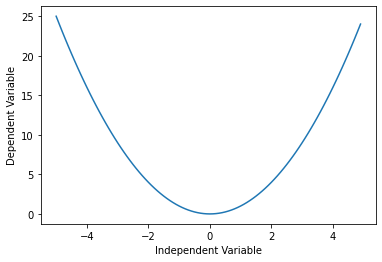

In [19]:
# Understanding non-linear regression using Exponential function

X = np.arange(-5.0, 5.0, 0.1)
Y = np.exp(X)
plt.plot(X,y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

<ipython-input-21-ca3c758bbe52>:3: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


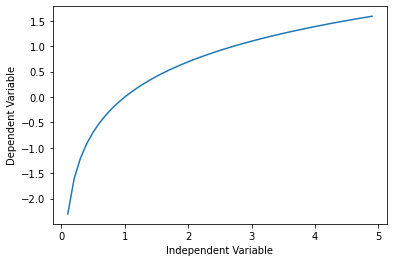

In [21]:
# Logarithmic function y = log(X)
X = np.arange(-5.0, 5.0, 0.1)
Y = np.log(X)
plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

#### Sigmoid function
$ Y = a + \frac b {1 + c ^{X-d} }$

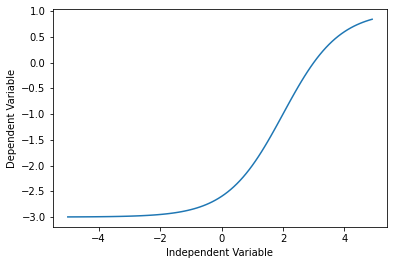

In [22]:
# Sigmoid / Logistic
X = np.arange(-5.0, 5.0, 0.1)
Y = 1-4/(1+np.power(3, X-2))
plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

## Build Non-Linear Regression Model

In [28]:
import numpy as np
import pandas as pd
df = pd.read_csv('china_gdp.csv')
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


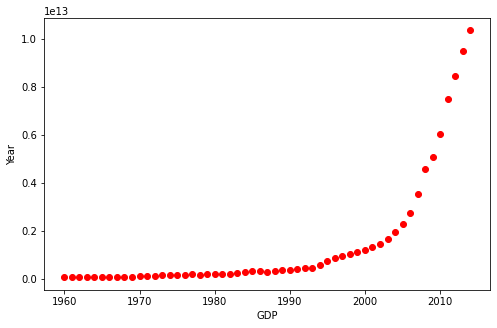

In [32]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.xlabel('GDP')
plt.ylabel('Year')
plt.show()

### Logistic function
$ \hat Y = \frac {1}{1 + e^{\beta_1(X-\beta_2)}}$

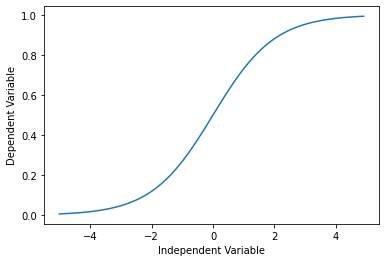

In [34]:
# Choosing a model
X = np.arange(-5.0,5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))
plt.plot(X, Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Sigmoid Function

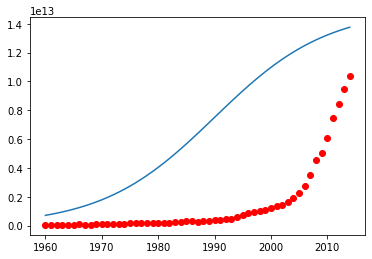

In [35]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y
beta_1 = 0.10
beta_2 = 1990.0
# Logistic function
Y_pred = sigmoid(x_data, beta_1, beta_2)
## Plot initial prediction model
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

 beta_1 = 690.451711, beta_2 = 0.997207


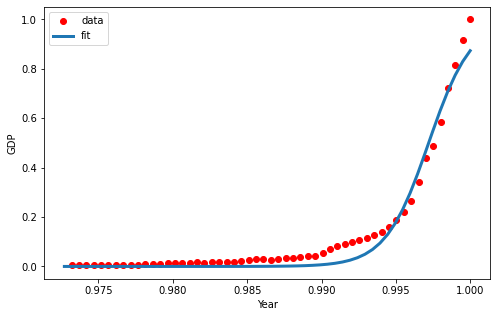

In [39]:
# Find best model parameters
## First normalize data
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)
## Using 'curve_fit'
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
## Print final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [43]:
# Testing Model Accuracy
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# Build a model using training set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# Predict using test set
y_hat = sigmoid(test_x, *popt)

# Evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares: %.2f" % np.mean((y_hat - test_y) **2))

from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat, test_y))


Mean absolute error: 0.20
Residual sum of squares: 0.14
R2-score: -96989903356264325825921091863838720.00


c:\users\krishna\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
